# Question 1

## EDA

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
df=pd.read_csv('bank_marketing_part1_Data.csv') 

In [157]:
df.shape

(210, 7)

In [158]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [10]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


Text(0.5, 1.0, 'Maximum amount paid in single shopping')

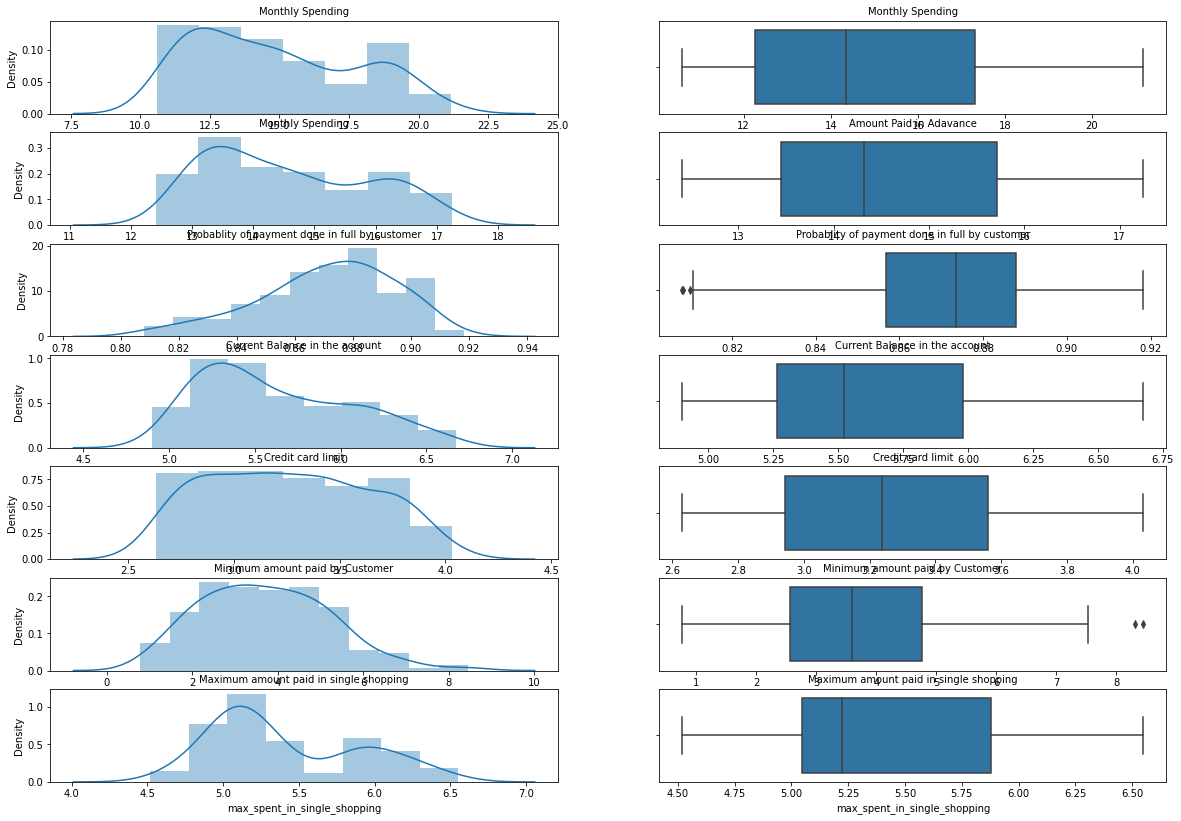

In [12]:
# Univariate Analysis

fig, axes = plt.subplots(nrows=7,ncols=2)
fig.set_size_inches(20, 14)

a = sns.distplot(df['spending'] , ax=axes[0][0])
a.set_title("Monthly Spending",fontsize=10)

a = sns.boxplot(df['spending'] , orient='v', ax=axes[0][1])
a.set_title("Monthly Spending",fontsize=10)

a = sns.distplot(df['advance_payments'] , ax=axes[1][0])
a.set_title("Monthly Spending",fontsize=10)

a = sns.boxplot(df['advance_payments'] , orient = "v" , ax=axes[1][1])
a.set_title("Amount Paid in Adavance",fontsize=10)

a = sns.distplot(df['probability_of_full_payment'] , ax=axes[2][0])
a.set_title("Probablity of payment done in full by customer",fontsize=10)

a = sns.boxplot(df['probability_of_full_payment'] , orient = "v" , ax=axes[2][1])
a.set_title("Probablity of payment done in full by customer",fontsize=10)

a = sns.distplot(df['current_balance'] , ax=axes[3][0])
a.set_title("Current Balance in the account",fontsize=10)

a = sns.boxplot(df['current_balance'] , orient = "v" , ax=axes[3][1])
a.set_title("Current Balance in the account",fontsize=10)

a = sns.distplot(df['credit_limit'] , ax=axes[4][0])
a.set_title("Credit card limit",fontsize=10)

a = sns.boxplot(df['credit_limit'] , orient = "v" , ax=axes[4][1])
a.set_title("Credit card limit",fontsize=10)

a = sns.distplot(df['min_payment_amt'] , ax=axes[5][0])
a.set_title("Minimum amount paid by Customer",fontsize=10)

a = sns.boxplot(df['min_payment_amt'] , orient = "v" , ax=axes[5][1])
a.set_title("Minimum amount paid by Customer",fontsize=10)

a = sns.distplot(df['max_spent_in_single_shopping'] , ax=axes[6][0])
a.set_title("Maximum amount paid in single shopping",fontsize=10)

a = sns.boxplot(df['max_spent_in_single_shopping'] , orient = "v" , ax=axes[6][1])
a.set_title("Maximum amount paid in single shopping",fontsize=10)

In [13]:
q1=df.quantile(q=0.25)
q3=df.quantile(q=0.75)
IQR=q3-q1
d1=df
d4=((d1 < (q1 - 1.5 * IQR)) | (d1 > (q3 + 1.5 * IQR))).sum()
d4

spending                        0
advance_payments                0
probability_of_full_payment     3
current_balance                 0
credit_limit                    0
min_payment_amt                 2
max_spent_in_single_shopping    0
dtype: int64

<Figure size 1152x432 with 0 Axes>

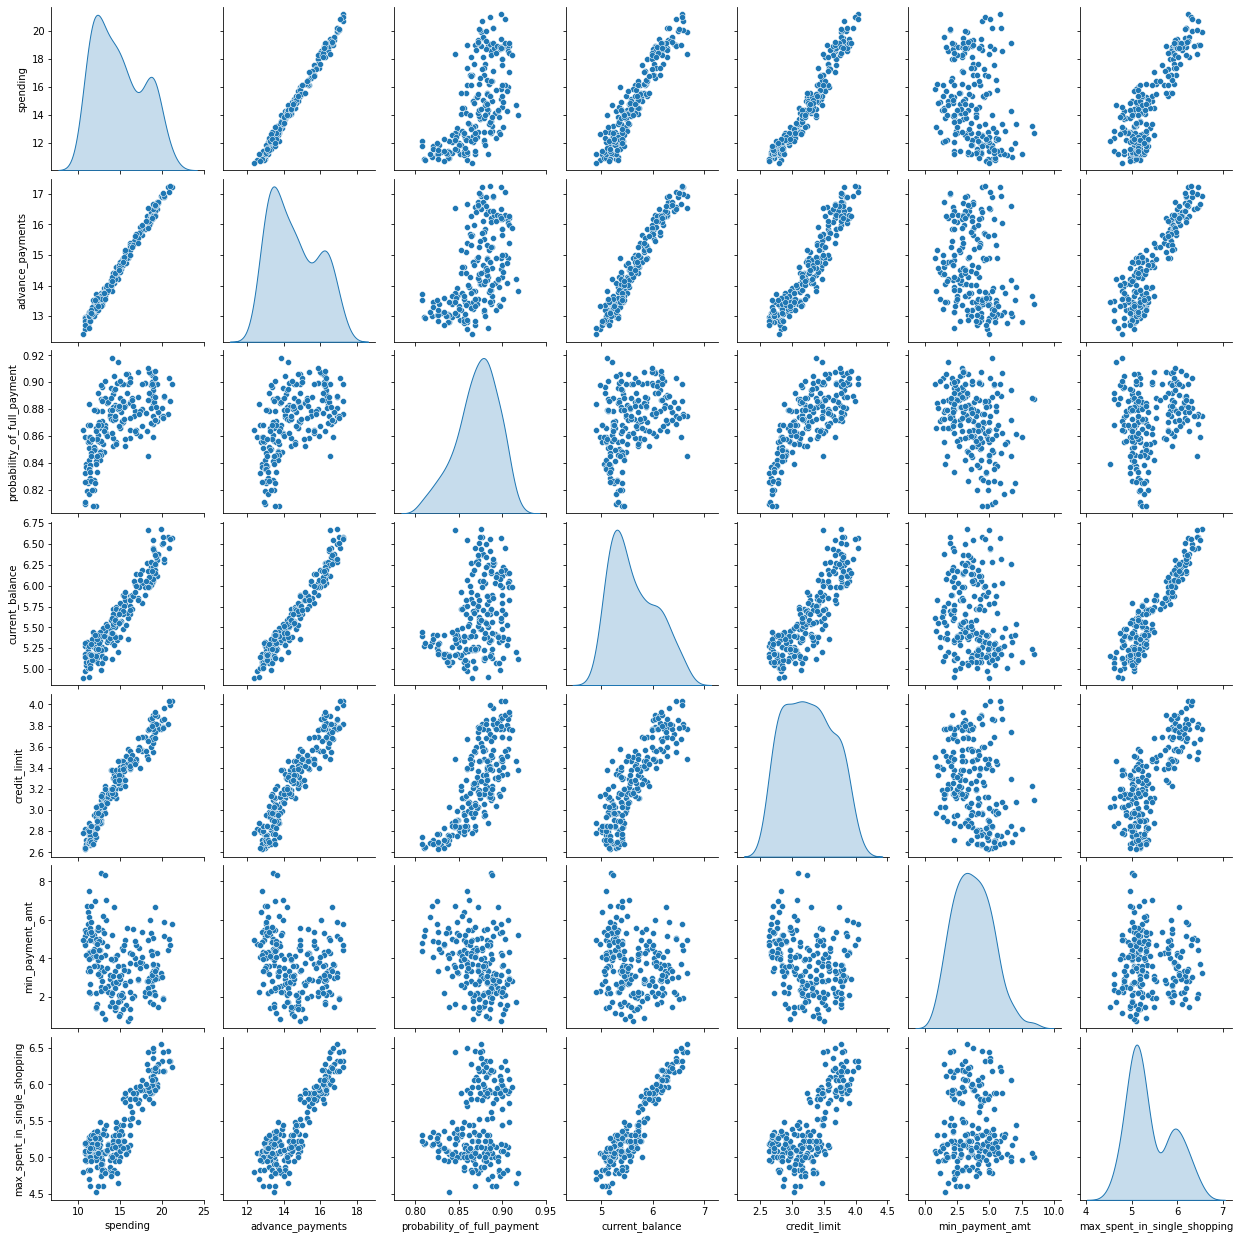

In [14]:
#Let us check for pair plots
plt.figure(figsize=(16,6))
sns.pairplot(df,diag_kind='kde')

<AxesSubplot:>

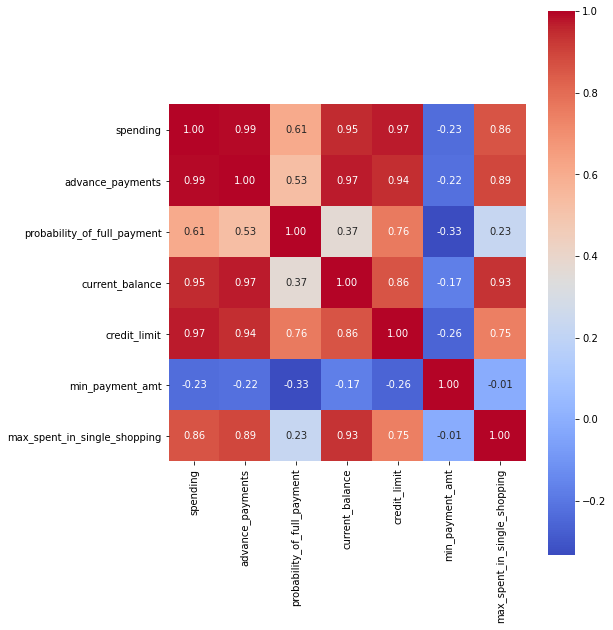

In [15]:
plt.subplots(figsize=(8,10))
sns.heatmap(df.corr(),annot=True, square=True,fmt='.2f', cmap='coolwarm') # plot the correlation coefficients as a heatmap

In [16]:
#We remove the outliers for all the columns by replacing the higher values with upper range and lower value with lower range
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [17]:
for i in df.columns:
    lr,ur=remove_outlier(df[i])
    df[i]=np.where(df[i]>ur,ur,df[i])
    df[i]=np.where(df[i]<lr,lr,df[i])

Text(0.5, 1.0, 'Minimum amount paid by Customer')

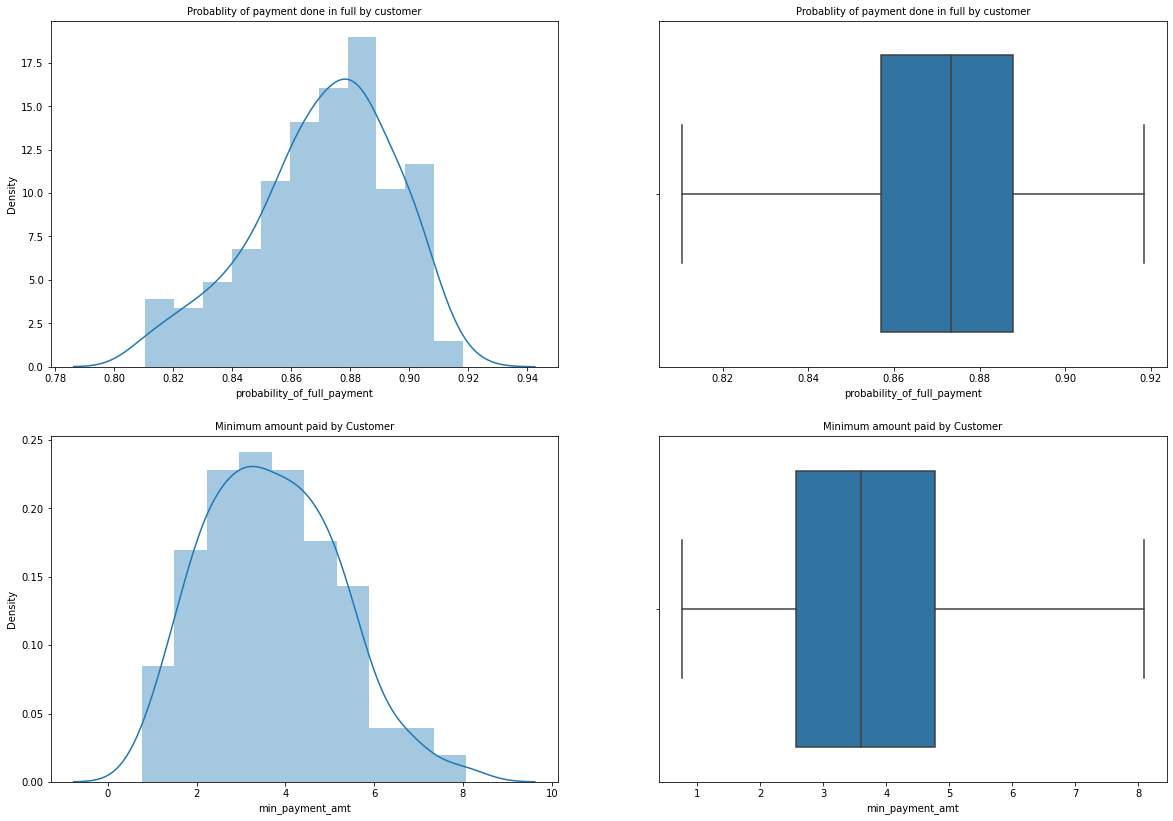

In [18]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 14)

a = sns.distplot(df['probability_of_full_payment'] , ax=axes[0][0])
a.set_title("Probablity of payment done in full by customer",fontsize=10)

a = sns.boxplot(df['probability_of_full_payment'] , orient = "v" , ax=axes[0][1])
a.set_title("Probablity of payment done in full by customer",fontsize=10)

a = sns.distplot(df['min_payment_amt'] , ax=axes[1][0])
a.set_title("Minimum amount paid by Customer",fontsize=10)

a = sns.boxplot(df['min_payment_amt'] , orient = "v" , ax=axes[1][1])
a.set_title("Minimum amount paid by Customer",fontsize=10)

In [19]:
from sklearn.preprocessing import StandardScaler #We scale the data that is treated for Outliers

In [20]:
X = StandardScaler()

In [21]:
scaled_df = X.fit_transform(df)

In [22]:
scaled_df=pd.DataFrame(scaled_df)

In [23]:
scaled_df.describe()

,0,1,2,3,4,5,6
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.638372e-15,-1.358702e-16,-2.790757e-16,1.554312e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.571391e+00,-1.650501e+00,-1.668209e+00,-1.966425e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-6.009681e-01,-8.286816e-01,-8.349072e-01,-7.616981e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.031721e-01,-2.376280e-01,-5.733534e-02,-6.591519e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.126469e-01,7.945947e-01,8.044956e-01,7.185591e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.011371e+00,2.367533e+00,2.055112e+00,2.938945e+00,2.328998e+00


## Hierarchical clustering

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [25]:
wardlink = linkage(scaled_df, method = 'ward')

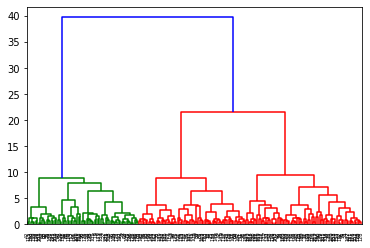

In [26]:
dend = dendrogram(wardlink)

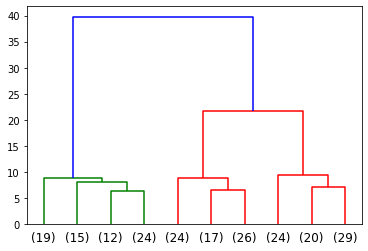

In [27]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [28]:
from scipy.cluster.hierarchy import fcluster

In [29]:
clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [30]:
df['clusters'] = clusters

In [31]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [32]:
df.to_csv('bv.csv') # convertt the data back to csv

## K Means Clustering

In [33]:
from sklearn.cluster import KMeans 

In [34]:
k_means = KMeans(n_clusters = 2)

In [35]:
k_means.fit(scaled_df)

KMeans(n_clusters=2)

In [36]:
k_means.labels_

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [37]:
k_means.inertia_

659.1474009548498

In [38]:
wss =[] 

In [39]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [40]:
wss

[1469.9999999999998,
 659.1474009548498,
 430.298481751223,
 370.69092922102,
 325.9446771140749,
 289.42134652874967,
 262.3602214923325,
 241.3139010273852,
 221.891856176513,
 206.60809617573418]

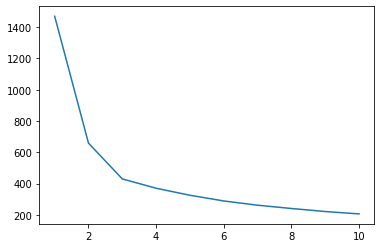

In [41]:
plt.plot(range(1,11), wss)

In [42]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
labels = k_means.labels_

In [43]:
df["Clus_kmeans"] = labels
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,1


In [44]:
df.to_csv('bcm.csv')

## Perfromance parameters for K Means Clustering

In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [46]:
silhouette_score(scaled_df,labels)

0.4008059221522216

In [47]:
sil_width = silhouette_samples(scaled_df,labels)

In [48]:
df["sil_width"] = sil_width
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,1,0.573278
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3,0,0.365564
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,1,0.637092
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2,2,0.515595
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,1,0.360972


In [49]:
df.sil_width.min()

0.002768541128616533

In [50]:
df.sil_width.max()

0.6386809253215441

# Question 2


## EDA

In [654]:
d2=pd.read_csv("insurance_part2_data.csv")

In [655]:
d2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [656]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [657]:
for column in d2[["Agency_Code", "Type","Channel", "Product Name","Destination","Claimed"]]:
    print("The unique values in", column, d2[column].nunique())
    print(d2[column].value_counts())
    print('\n')

The unique values in Agency_Code 4
EPX    1365
C2B     924
CWT     472
JZI     239
Name: Agency_Code, dtype: int64


The unique values in Type 2
Travel Agency    1837
Airlines         1163
Name: Type, dtype: int64


The unique values in Channel 2
Online     2954
Offline      46
Name: Channel, dtype: int64


The unique values in Product Name 5
Customised Plan      1136
Cancellation Plan     678
Bronze Plan           650
Silver Plan           427
Gold Plan             109
Name: Product Name, dtype: int64


The unique values in Destination 3
ASIA        2465
Americas     320
EUROPE       215
Name: Destination, dtype: int64


The unique values in Claimed 2
No     2076
Yes     924
Name: Claimed, dtype: int64




In [658]:
d2.describe()

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


In [659]:
d2.isna().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

Text(0.5, 1.0, 'Sales')

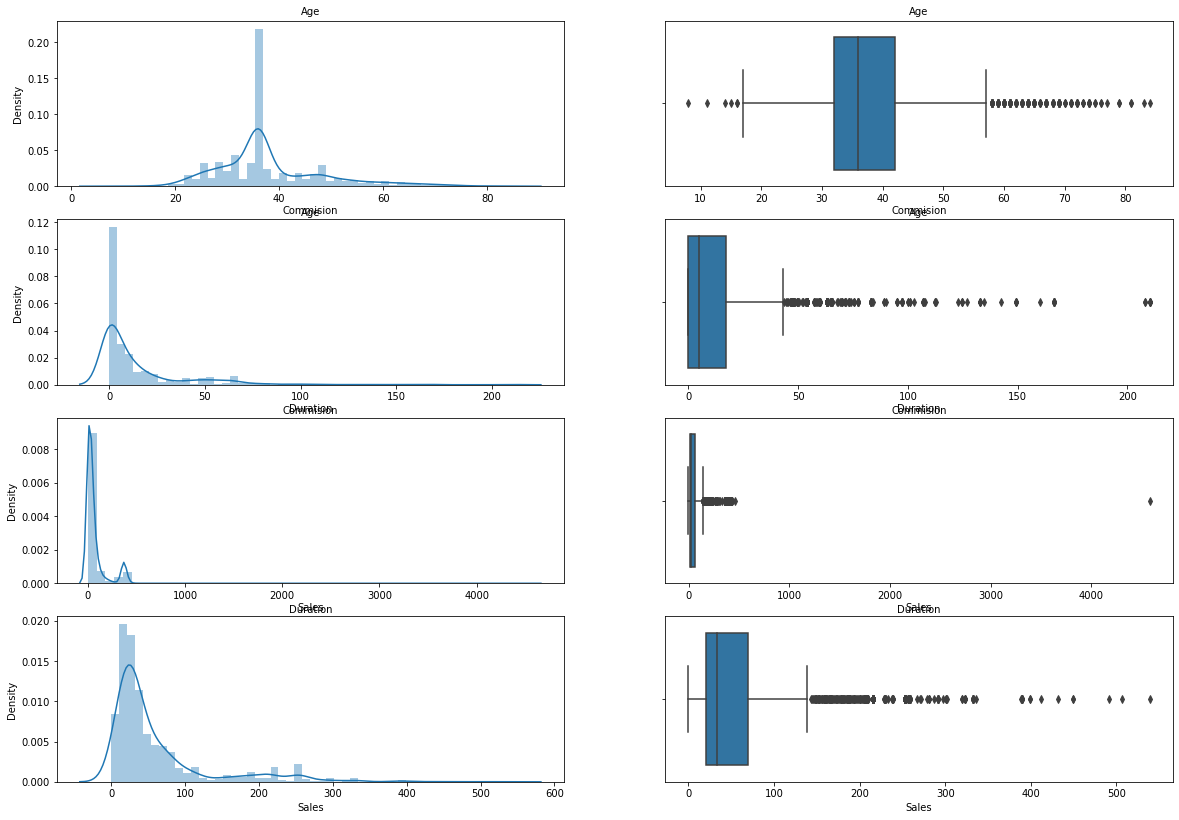

In [660]:
# Univariate Analysis

fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20, 14)

a = sns.distplot(d2['Age'] , ax=axes[0][0])
a.set_title("Age",fontsize=10)
a = sns.boxplot(d2['Age'] , orient='v', ax=axes[0][1])
a.set_title("Age",fontsize=10)

a = sns.distplot(d2['Commision'] , ax=axes[1][0])
a.set_title("Commision",fontsize=10)
a = sns.boxplot(d2['Commision'] , orient='v', ax=axes[1][1])
a.set_title("Commision",fontsize=10)

a = sns.distplot(d2['Duration'] , ax=axes[2][0])
a.set_title("Duration",fontsize=10)
a = sns.boxplot(d2['Duration'] , orient='v', ax=axes[2][1])
a.set_title("Duration",fontsize=10)

a = sns.distplot(d2['Sales'] , ax=axes[3][0])
a.set_title("Sales",fontsize=10)
a = sns.boxplot(d2['Sales'] , orient='v', ax=axes[3][1])
a.set_title("Sales",fontsize=10)

<Figure size 1152x432 with 0 Axes>

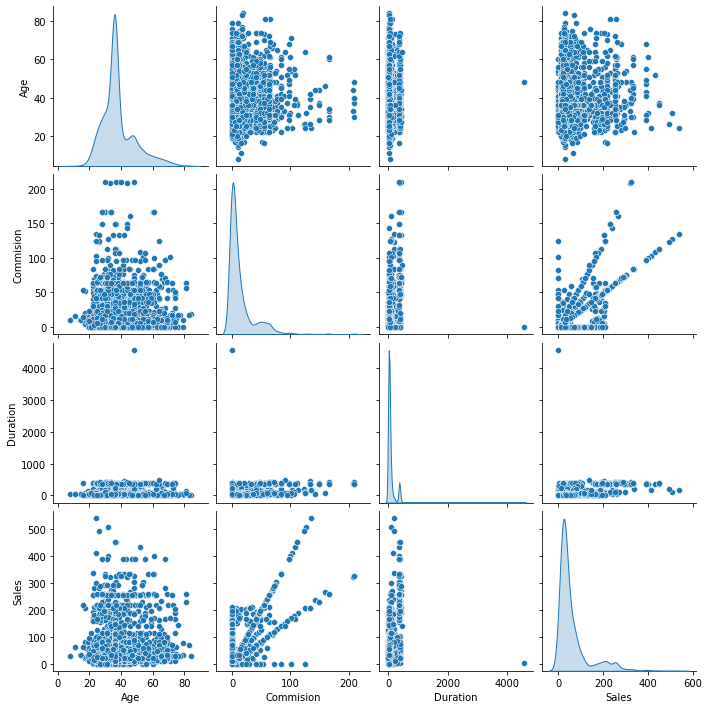

In [661]:
#Let us check for pair plots
plt.figure(figsize=(16,6))
sns.pairplot(d2,diag_kind='kde')

<AxesSubplot:>

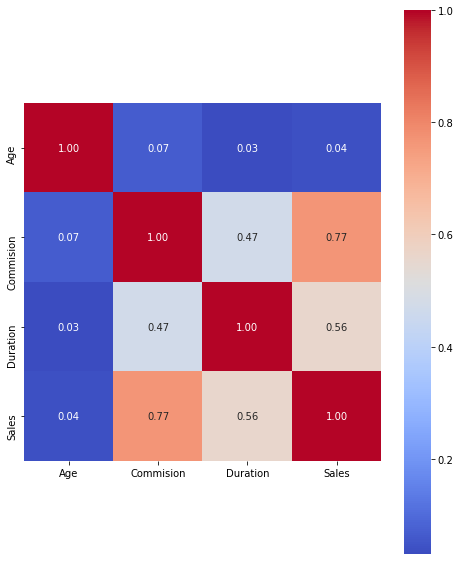

In [662]:
plt.subplots(figsize=(8,10))
sns.heatmap(d2[["Age","Commision","Duration","Sales"]].corr(),annot=True, square=True,fmt='.2f', cmap='coolwarm') # plot the correlation coefficients as a heatmap

In [663]:
for feature in d2.columns: 
    if d2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(d2[feature].unique()))
        print(pd.Categorical(d2[feature].unique()).codes)
        d2[feature] = pd.Categorical(d2[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [664]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [665]:
d2.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [666]:
d2["Product Name"].value_counts(normalize=True)

2    0.378667
1    0.226000
0    0.216667
4    0.142333
3    0.036333
Name: Product Name, dtype: float64

In [667]:
d3=d2
d3.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [668]:
X = d2.drop("Claimed", axis=1)

y = d2.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [669]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=21)
X_train.shape

(2100, 9)

In [670]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Decision Tree Classifier

In [680]:
param_grid = {
   'criterion': ['gini'],
    'max_depth': [10], #7,8,9,12
    'max_features': [7],#6,8,9
    'min_samples_leaf': [40],#20,25,30,35
    'min_samples_split':[95],#100,110,120
}

dtcl = DecisionTreeClassifier(random_state=21)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 5)

In [681]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 40, 'min_samples_split': 95}


DecisionTreeClassifier(max_depth=10, max_features=7, min_samples_leaf=40,
                       min_samples_split=95, random_state=21)

In [682]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

## Generating Tree

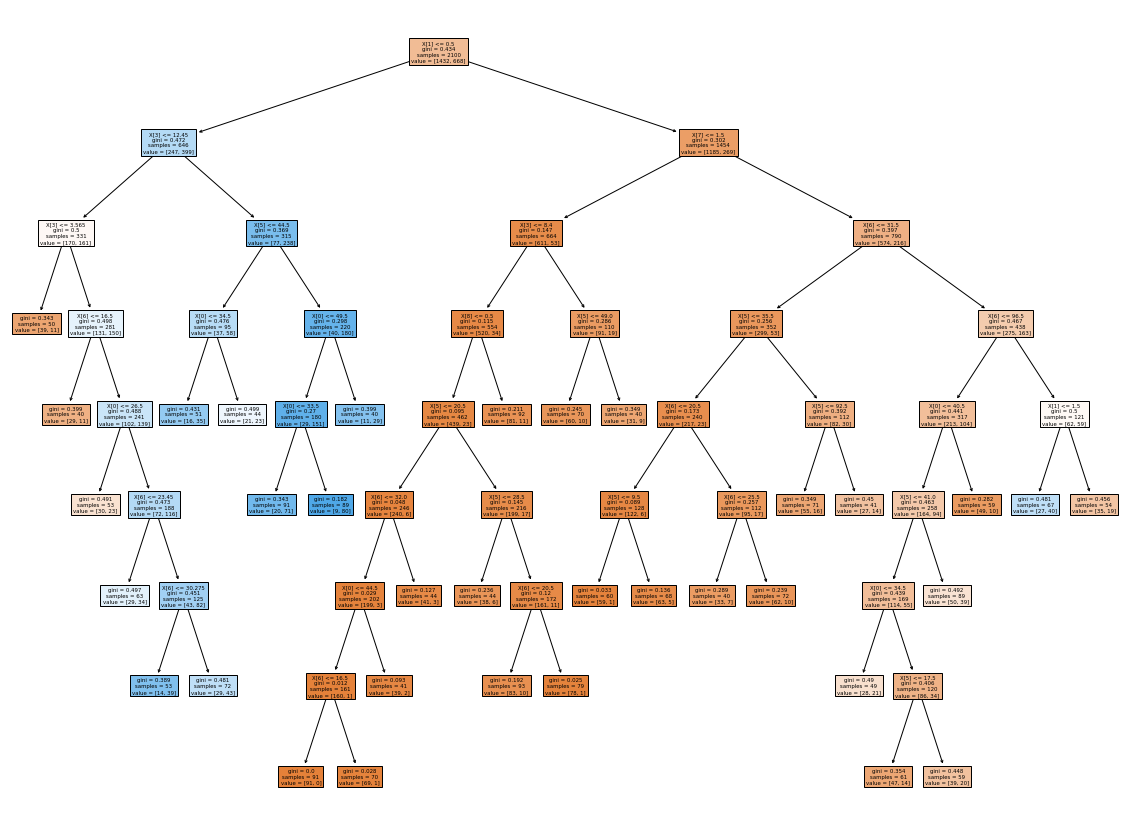

In [683]:
from sklearn import tree
plt.figure(figsize=(20,15))
d2_t=tree.plot_tree(best_grid,filled=True)

In [685]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.582710
Sales         0.117703
Commision     0.115907
Product Name  0.092136
Duration      0.050216
Age           0.038782
Destination   0.002546
Type          0.000000
Channel       0.000000


## Predicting on Training and Test dataset

In [686]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## Getting the Predicted Classes and Probs


In [687]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.000000,0.000000
1,0.402778,0.597222
2,0.830508,0.169492
3,0.892473,0.107527
4,0.566038,0.433962


## Plotting AUC-ROC curve - Train data : MODEL EVALUATION

AUC: 0.840


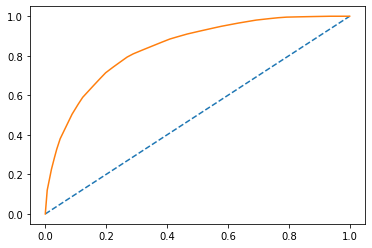

In [688]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

## Plotting AUC-ROC curve - Test data : MODEL EVALUATION


AUC: 0.791


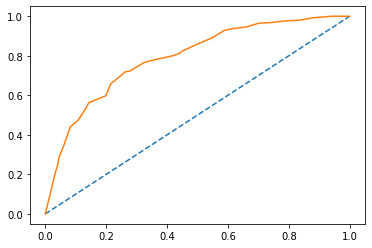

In [689]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

## Confusion matrix Train data

In [690]:
confusion_matrix(train_labels, ytrain_predict)

array([[1256,  176],
       [ 274,  394]], dtype=int64)

In [691]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7857142857142857

In [692]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1432
           1       0.69      0.59      0.64       668

    accuracy                           0.79      2100
   macro avg       0.76      0.73      0.74      2100
weighted avg       0.78      0.79      0.78      2100



In [221]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][1],2)
cart_train_recall=round(df.loc["1"][2],2)
cart_train_f1=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.55
cart_train_recall  0.62
cart_train_f1  0.71


## Confusion matrix Test data

In [222]:
confusion_matrix(test_labels, ytest_predict)

array([[565,  79],
       [109, 147]], dtype=int64)

In [223]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7911111111111111

In [224]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       644
           1       0.65      0.57      0.61       256

    accuracy                           0.79       900
   macro avg       0.74      0.73      0.73       900
weighted avg       0.78      0.79      0.79       900



In [225]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][1],2)
cart_test_recall=round(df.loc["1"][2],2)
cart_test_f1=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_test_precision)
print ('cart_train_recall ',cart_test_recall)
print ('cart_train_f1 ',cart_test_f1)

cart_train_precision  0.57
cart_train_recall  0.61
cart_train_f1  0.65


# Random Forest

In [192]:
param_grid = {
    'max_depth': [25,30],
    'max_features': [7,9],
    'min_samples_leaf': [8,10],
    'min_samples_split': [25,30],
    'n_estimators': [300]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [193]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [25, 30], 'max_features': [7, 9],
                         'min_samples_leaf': [8, 10],
                         'min_samples_split': [25, 30], 'n_estimators': [300]})

In [194]:
grid_search.best_params_

{'max_depth': 30,
 'max_features': 7,
 'min_samples_leaf': 8,
 'min_samples_split': 30,
 'n_estimators': 300}

In [195]:
best_grid = grid_search.best_estimator_

In [196]:
best_grid

RandomForestClassifier(max_depth=30, max_features=7, min_samples_leaf=8,
                       min_samples_split=30, n_estimators=300)

## Predicting on Test and Train data

In [197]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## Confusion matrix : Train data : MODEL EVALUATION

In [198]:
confusion_matrix(train_labels,ytrain_predict)

array([[1303,  129],
       [ 243,  425]], dtype=int64)

In [199]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8228571428571428

In [200]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1432
           1       0.77      0.64      0.70       668

    accuracy                           0.82      2100
   macro avg       0.80      0.77      0.79      2100
weighted avg       0.82      0.82      0.82      2100



In [201]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][1],2)
rf_train_recall=round(df.loc["1"][2],2)
rf_train_f1=round(df.loc["1"][0],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.64
rf_train_recall  0.7
rf_train_f1  0.77


## Plotting AUC-ROC curve - Test data : MODEL EVALUATION


Area under Curve is 0.773071873013749


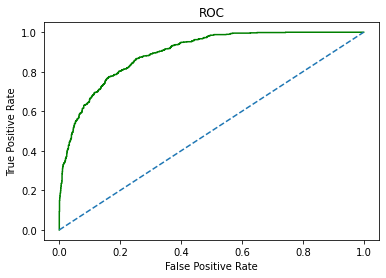

In [202]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

## Confusion matrix : Test data : MODEL EVALUATION

In [203]:
confusion_matrix(test_labels,ytest_predict)

array([[551,  93],
       [102, 154]], dtype=int64)

In [204]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7833333333333333

In [205]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       644
           1       0.62      0.60      0.61       256

    accuracy                           0.78       900
   macro avg       0.73      0.73      0.73       900
weighted avg       0.78      0.78      0.78       900



In [206]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][1],2)
rf_test_recall=round(df.loc["1"][2],2)
rf_test_f1=round(df.loc["1"][0],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.6
rf_test_recall  0.61
rf_test_f1  0.62


## Plotting AUC-ROC curve - Test data : MODEL EVALUATION


Area under Curve is 0.7285762810559007


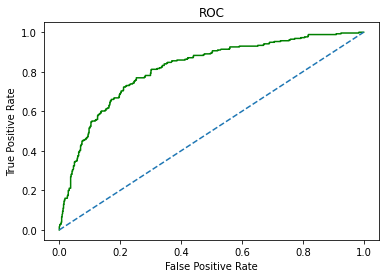

In [207]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', rf_test_auc)

In [208]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.348264
Sales         0.212577
Product Name  0.141353
Duration      0.126158
Commision     0.083858
Age           0.072006
Destination   0.012318
Type          0.002744
Channel       0.000722


## ANN 

In [637]:
param_grid = {
    'hidden_layer_sizes': [200], #,50,100,200,300
    'max_iter': [5000,7000], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=21)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [638]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 200, 'max_iter': 5000, 'solver': 'adam', 'tol': 0.01}

In [639]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=200, max_iter=5000, random_state=21, tol=0.01)

## Predicitng on train and test data

In [640]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

## Confusion Matrix for Train data: MODEL EVALUATION

In [641]:
confusion_matrix(train_labels,ytrain_predict)

array([[1278,  154],
       [ 312,  356]], dtype=int64)

In [642]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7780952380952381

In [644]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1432
           1       0.70      0.53      0.60       668

    accuracy                           0.78      2100
   macro avg       0.75      0.71      0.73      2100
weighted avg       0.77      0.78      0.77      2100



In [645]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][1],2)
nn_train_recall=round(df.loc["1"][2],2)
nn_train_f1=round(df.loc["1"][0],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.53
nn_train_recall  0.6
nn_train_f1  0.7


## Plotting ROC curve train data

Area under Curve is 0.7126961161475932


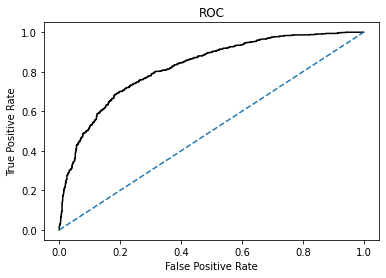

In [646]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', nn_train_auc)

## Confusion matrix for Test data : MODEL EVALUATION

In [647]:
confusion_matrix(test_labels,ytest_predict)

array([[574,  70],
       [112, 144]], dtype=int64)

In [648]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7977777777777778

In [649]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       644
           1       0.67      0.56      0.61       256

    accuracy                           0.80       900
   macro avg       0.75      0.73      0.74       900
weighted avg       0.79      0.80      0.79       900



In [634]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][1],2)
nn_test_recall=round(df.loc["1"][2],2)
nn_test_f1=round(df.loc["1"][0],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.45
nn_test_recall  0.53
nn_test_f1  0.66


## Plotting ROC curve Test data

Area under Curve is 0.7269021739130435


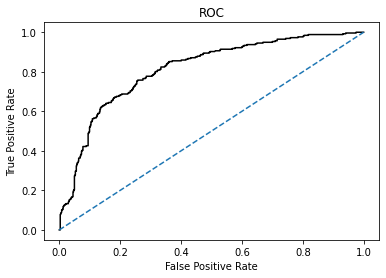

In [487]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', nn_test_auc)

In [635]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=300, max_iter=5000, random_state=21, tol=0.01)>

## Merging data from three models.

In [697]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.79,0.79,0.82,0.78,0.78,0.80
AUC,0.84,0.79,0.77,0.73,0.71,0.73
Recall,0.62,0.61,0.70,0.61,0.60,0.53
Precision,0.55,0.57,0.64,0.60,0.53,0.45
F1 Score,0.71,0.65,0.77,0.62,0.70,0.66


## Plotting ROC curve for all three models : Train data

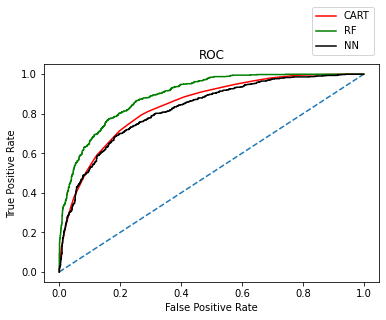

In [693]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## Plotting ROC curve for all three models : Test data

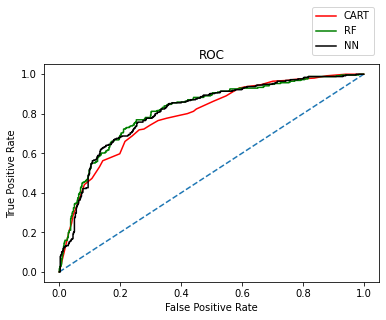

In [694]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## Treating Outliers and Scaling

In [695]:
d3=pd.read_csv("insurance_part2_data.csv")

In [696]:
for feature in d3.columns: 
    if d3[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(d3[feature].unique()))
        print(pd.Categorical(d3[feature].unique()).codes)
        d3[feature] = pd.Categorical(d3[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [573]:
d3.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [574]:
#We remove the outliers for all the columns by replacing the higher values with upper range and lower value with lower range
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [575]:
for i in d3.columns:
    lr,ur=remove_outlier(d3[i])
    d3[i]=np.where(d3[i]>ur,ur,d3[i])
    d3[i]=np.where(d3[i]<lr,lr,d3[i])

Text(0.5, 1.0, 'Sales')

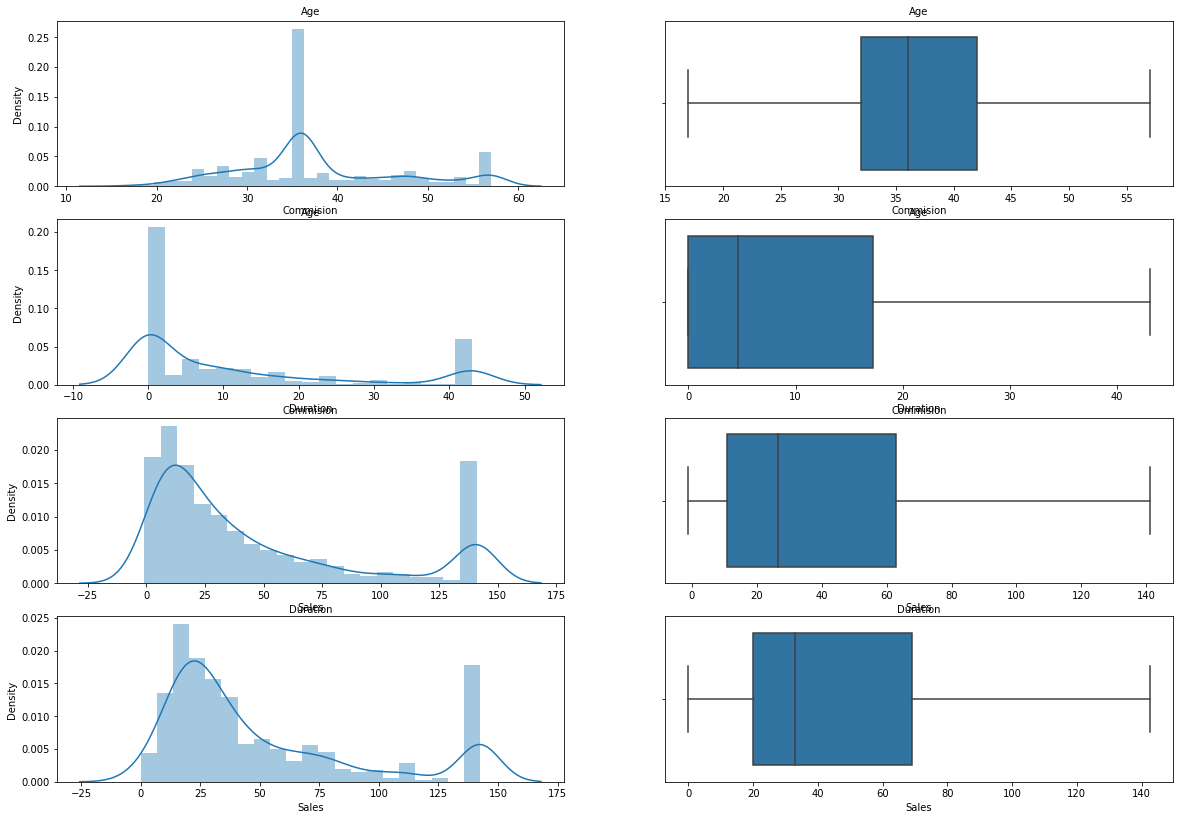

In [576]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20, 14)

a = sns.distplot(d3['Age'] , ax=axes[0][0])
a.set_title("Age",fontsize=10)
a = sns.boxplot(d3['Age'] , orient='v', ax=axes[0][1])
a.set_title("Age",fontsize=10)

a = sns.distplot(d3['Commision'] , ax=axes[1][0])
a.set_title("Commision",fontsize=10)
a = sns.boxplot(d3['Commision'] , orient='v', ax=axes[1][1])
a.set_title("Commision",fontsize=10)

a = sns.distplot(d3['Duration'] , ax=axes[2][0])
a.set_title("Duration",fontsize=10)
a = sns.boxplot(d3['Duration'] , orient='v', ax=axes[2][1])
a.set_title("Duration",fontsize=10)

a = sns.distplot(d3['Sales'] , ax=axes[3][0])
a.set_title("Sales",fontsize=10)
a = sns.boxplot(d3['Sales'] , orient='v', ax=axes[3][1])
a.set_title("Sales",fontsize=10)

In [577]:
X = d3.drop("Claimed", axis=1)

y = d3.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0.0,0.0,0.70,1.0,7.0,2.51,2.0,0.0
1,36.0,2.0,1.0,0.00,1.0,34.0,20.00,2.0,0.0
2,39.0,1.0,1.0,5.94,1.0,3.0,9.90,2.0,0.0
3,36.0,2.0,1.0,0.00,1.0,4.0,26.00,1.0,0.0
4,33.0,3.0,0.0,6.30,1.0,53.0,18.00,0.0,0.0


In [578]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [579]:
from sklearn.preprocessing import StandardScaler

In [580]:
X = StandardScaler()

In [581]:
X_train=X.fit_transform(X_train)

In [582]:
X_test=X.transform(X_test)

In [583]:
clf = MLPClassifier(hidden_layer_sizes=200, max_iter=5000,
                     solver='adam', verbose=True,  random_state=21,tol=0.01)

In [584]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 1.05104786
Iteration 2, loss = 0.64273521
Iteration 3, loss = 0.55610520
Iteration 4, loss = 0.53818230
Iteration 5, loss = 0.52256379
Iteration 6, loss = 0.50386225
Iteration 7, loss = 0.49718498
Iteration 8, loss = 0.49361265
Iteration 9, loss = 0.50256045
Iteration 10, loss = 0.49755619
Iteration 11, loss = 0.48551512
Iteration 12, loss = 0.49619577
Iteration 13, loss = 0.50067043
Iteration 14, loss = 0.47548843
Iteration 15, loss = 0.47855588
Iteration 16, loss = 0.47469371
Iteration 17, loss = 0.48012097
Iteration 18, loss = 0.47766092
Iteration 19, loss = 0.47217006
Iteration 20, loss = 0.47418400
Iteration 21, loss = 0.47095243
Iteration 22, loss = 0.47125200
Iteration 23, loss = 0.46818977
Iteration 24, loss = 0.46976303
Iteration 25, loss = 0.47007537
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [586]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[572,  72],
       [113, 143]], dtype=int64)

In [587]:
pred2 = clf.predict(x_train)
confusion_matrix(y_train,pred2)

array([[1281,  151],
       [ 308,  360]], dtype=int64)

In [588]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       644
           1       0.67      0.56      0.61       256

    accuracy                           0.79       900
   macro avg       0.75      0.72      0.73       900
weighted avg       0.79      0.79      0.79       900



In [589]:
print(classification_report(y_train, pred2))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1432
           1       0.70      0.54      0.61       668

    accuracy                           0.78      2100
   macro avg       0.76      0.72      0.73      2100
weighted avg       0.77      0.78      0.77      2100

